# Pre-Lab for Figure 3 of Siegal Neuropixels Paper

## Does functional hierarchy match anatomical hierarchy?

### This paper is asking if functional hierarchy matches anatomical hierarchy. Past research has shown the anatomical pecking paper based on neuron projections into the corticol and thalamic areas. The lateral geniculate nucleus (LGN) is at the bottom of the anatomical hierarchy, while the anteromedial visual area (AM) is at the top. Does this order change when looking at function?

## 1. Look at firing rates. 

### Neuropixels are used to see how the firing rates differ between various brain regions. The more delayed the firing rate, the higher the position of that area in the hierarchy. For example, the LGN is hypothesized to fire first and then send its message to the next structure, and so on and so forth. Since it would receive the message last, the AM will fire last, showing that it is at the top of the hierarchy. 

## 2. Look at receptive fields. 

### Examining the size difference of receptive fields among different brain structures also hints at the functional hierarchy. The larger the receptive field, the higher the position of that area in the hierarchy. For example, if the AM is at the top of the hierarchy, it is receiving action potentials from many different areas. These numerous action potentials combine to form a larger visual field. If the LGN is at the bottom of the hierarchy, it does not have many sources of action potentials and the visual field will be small. 

### This Jupyter notebook will map the receptive visual fields of the LGN and AM to determine their relative positions in the functional hierarchy. 

In [1]:
# showing that the receptive visual field for AM is bigger than that of LGN 
# therefore, AM is higher in the functional/anatomical hierarchy than LGN
# access data
import os
import shutil

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
%matplotlib inline


from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

In [2]:
data_directory = '/Users/tulsipatel/local1/ecephys_cache_dir' 
# must be updated to a valid directory in your filesystem

manifest_path = os.path.join(data_directory, "manifest.json")

In [3]:
cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)

# Find ALL the sessions. 

In [4]:
sessions = cache.get_session_table()

print('Total number of sessions: ' + str(len(sessions)))

sessions.head()

Total number of sessions: 58


,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
715093703,2019-10-03T00:00:00Z,699733581,brain_observatory_1.1,118.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,884,2219,6,"[CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ..."
719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N..."
721123822,2019-10-03T00:00:00Z,707296982,brain_observatory_1.1,125.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,444,2229,6,"[MB, SCig, PPT, NOT, DG, CA1, VISam, nan, LP, ..."
732592105,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt,824,1847,5,"[grey, VISpm, nan, VISp, VISl, VISal, VISrl]"
737581020,2019-10-03T00:00:00Z,718643567,brain_observatory_1.1,108.0,M,wt/wt,568,2218,6,"[grey, VISmma, nan, VISpm, VISp, VISl, VISrl]"


# Find the sessions that matter (Male, WT, in specific data set, in AM (VISam)).

In [5]:
filtered_sessions = sessions[(sessions.sex == 'M') & \
                             (sessions.full_genotype.str.find('wt') > -1) & \
                             (sessions.session_type == 'brain_observatory_1.1') & \
                             (['VISam' in acronyms for acronyms in 
                               sessions.ecephys_structure_acronyms])]

filtered_sessions.head()

,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
715093703,2019-10-03T00:00:00Z,699733581,brain_observatory_1.1,118.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,884,2219,6,"[CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ..."
719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N..."
721123822,2019-10-03T00:00:00Z,707296982,brain_observatory_1.1,125.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,444,2229,6,"[MB, SCig, PPT, NOT, DG, CA1, VISam, nan, LP, ..."
739448407,2019-10-03T00:00:00Z,716813543,brain_observatory_1.1,112.0,M,wt/wt,625,2221,6,"[grey, VISam, nan, VIS, VISp, VISl, VISrl]"
743475441,2019-10-03T00:00:00Z,722882755,brain_observatory_1.1,121.0,M,wt/wt,553,2225,6,"[LP, LGd, HPF, DG, CA3, CA1, VISrl, nan, PP, P..."


# Find the sessions that matter (Male, WT, in specific data set, in LGN (LGd)).

In [6]:
filtered_sessions = sessions[(sessions.sex == 'M') & \
                             (sessions.full_genotype.str.find('wt') > -1) & \
                             (sessions.session_type == 'brain_observatory_1.1') & \
                             (['LGd' in acronyms for acronyms in 
                               sessions.ecephys_structure_acronyms])]

filtered_sessions.head()

,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
715093703,2019-10-03T00:00:00Z,699733581,brain_observatory_1.1,118.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,884,2219,6,"[CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ..."
719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N..."
721123822,2019-10-03T00:00:00Z,707296982,brain_observatory_1.1,125.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,444,2229,6,"[MB, SCig, PPT, NOT, DG, CA1, VISam, nan, LP, ..."
743475441,2019-10-03T00:00:00Z,722882755,brain_observatory_1.1,121.0,M,wt/wt,553,2225,6,"[LP, LGd, HPF, DG, CA3, CA1, VISrl, nan, PP, P..."
744228101,2019-10-03T00:00:00Z,719817805,brain_observatory_1.1,122.0,M,wt/wt,659,2226,6,"[Eth, TH, LP, POL, APN, DG, CA1, VIS, nan, CA3..."


In [7]:
sessions = cache.get_session_table()

session = cache.get_session_data(sessions.index.values[20])

# Get desired stimulus (flashes).

In [8]:
rf_stim_table = session.stimulus_presentations[session.stimulus_presentations.stimulus_name == 'flashes']



In [9]:
keys = rf_stim_table.keys()
[key for key in keys if len(np.unique(rf_stim_table[key])) > 1]

['color', 'start_time', 'stop_time', 'duration', 'stimulus_condition_id']

In [10]:
print('Unique orientations : ' + str(list(np.sort(rf_stim_table.orientation.unique()))))
print('Unique x positions : ' + str(list(np.sort(rf_stim_table.x_position.unique()))))
print('Unique y positions : ' + str(list(np.sort(rf_stim_table.y_position.unique()))))

Unique orientations : [0.0]
Unique x positions : ['null']
Unique y positions : ['null']


In [11]:
print('Spatial frequency: ' + str(rf_stim_table.spatial_frequency.unique()[0]))
print('Temporal frequency: ' + str(rf_stim_table.temporal_frequency.unique()[0]))
print('Size: ' + str(rf_stim_table['size'].unique()[0]))
print('Contrast: ' + str(rf_stim_table['contrast'].unique()[0]))

Spatial frequency: [0.0, 0.0]
Temporal frequency: null
Size: [300.0, 300.0]
Contrast: 0.8


In [12]:
rf_stim_table.keys()

Index(['color', 'contrast', 'frame', 'orientation', 'phase', 'size',
       'spatial_frequency', 'start_time', 'stimulus_block', 'stimulus_name',
       'stop_time', 'temporal_frequency', 'x_position', 'y_position',
       'duration', 'stimulus_condition_id'],
      dtype='object')

# Get mechanism to map receptive fields from Allen. 

In [13]:
from allensdk.brain_observatory.ecephys.stimulus_analysis.receptive_field_mapping import ReceptiveFieldMapping

rf_mapping = ReceptiveFieldMapping(session)

In [14]:
rf_mapping.stim_table

,contrast,orientation,phase,size,spatial_frequency,start_time,stimulus_block,stimulus_name,stop_time,temporal_frequency,x_position,y_position,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,,,,
1,0.8,0,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,84.804349,0,gabors,85.037870,4,-10,-40,0.233521,1
2,0.8,0,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,85.037870,0,gabors,85.288070,4,30,40,0.250201,2
3,0.8,0,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,85.288070,0,gabors,85.538271,4,0,0,0.250201,3
4,0.8,45,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,85.538271,0,gabors,85.788472,4,-20,20,0.250201,4
5,0.8,0,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,85.788472,0,gabors,86.038686,4,-40,40,0.250214,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3641,0.8,90,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,995.598539,0,gabors,995.848745,4,30,-10,0.250206,175
3642,0.8,45,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,995.848745,0,gabors,996.098950,4,30,10,0.250206,228
3643,0.8,0,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,996.098950,0,gabors,996.349156,4,30,-20,0.250206,156


# Plot sessions in VISam. 

In [15]:
visam_units = session.units[session.units.ecephys_structure_acronym == 'VISam']

In [16]:
AF = rf_mapping.get_receptive_field(visam_units.index.values[0])

/Users/tulsipatel/.local/lib/python3.8/site-packages/allensdk/brain_observatory/ecephys/ecephys_session.py:644: UserWarning: You've specified some overlapping time intervals between neighboring rows: [(0, 1)], with a maximum overlap of 0.015479378234388719 seconds.
  warnings.warn(f"You've specified some overlapping time intervals between neighboring rows: {overlapping}, "


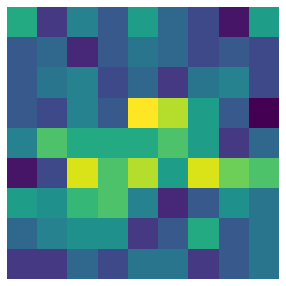

In [17]:
plt.figure(figsize=(5,5))
_ = plt.imshow(AF)
_ = plt.axis('off')

# Plot sessions in LGd. 

In [18]:
lgd_units = session.units[session.units.ecephys_structure_acronym == 'LGd']

In [19]:
LF = rf_mapping.get_receptive_field(lgd_units.index.values[0])

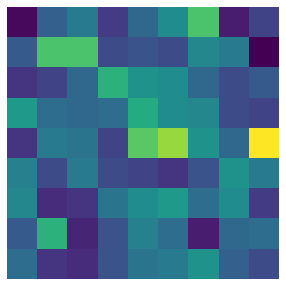

In [20]:
plt.figure(figsize=(5,5))
_ = plt.imshow(LF)
_ = plt.axis('off')